# ***Predicting Adult Income***

# Introduction and Data Overview

**Data Overview and Preprocessing**

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
%pip install ucimlrepo

In [127]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

In [128]:
df = pd.concat([X, y], axis=1)

In [129]:
df.dropna(inplace = True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [130]:
df.drop('fnlwgt', axis = 1, inplace = True)

In [131]:
df.drop('education-num', axis = 1, inplace = True)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47621 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47621 non-null  int64 
 1   workclass       47621 non-null  object
 2   education       47621 non-null  object
 3   marital-status  47621 non-null  object
 4   occupation      47621 non-null  object
 5   relationship    47621 non-null  object
 6   race            47621 non-null  object
 7   sex             47621 non-null  object
 8   capital-gain    47621 non-null  int64 
 9   capital-loss    47621 non-null  int64 
 10  hours-per-week  47621 non-null  int64 
 11  native-country  47621 non-null  object
 12  income          47621 non-null  object
dtypes: int64(4), object(9)
memory usage: 5.1+ MB


In [133]:
print("Age Range: [" + str(df['age'].min()) + ", " + str(df['age'].max()) + "]")

Age Range: [17, 90]


In [134]:
print(f'Workclass Types: {df["workclass"].unique()}')

Workclass Types: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


In [135]:
print(f'Education Types: {df["education"].unique()}')

Education Types: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


In [136]:
print(f'Marital Status Types: {df["marital-status"].unique()}')

Marital Status Types: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


In [137]:
print(f'Occupation Types: {df["occupation"].unique()}')

Occupation Types: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']


In [138]:
print(f'Relationship Types: {df["relationship"].unique()}')

Relationship Types: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']


In [139]:
print(f'Race Types: {df["race"].unique()}')

Race Types: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']


In [140]:
print(f'Gender Types: {df["sex"].unique()}')

Gender Types: ['Male' 'Female']


In [141]:
print(f'Capital Gain Range: [{df["capital-gain"].min()}, {df["capital-gain"].max()}]')

Capital Gain Range: [0, 99999]


In [142]:
print(f'Capital Loss Range: [{df["capital-loss"].min()}, {df["capital-loss"].max()}]')

Capital Loss Range: [0, 4356]


In [143]:
print(f'Hours Per Week Range: [{df["hours-per-week"].min()}, {df["hours-per-week"].max()}]')

Hours Per Week Range: [1, 99]


In [144]:
print(f'Hours Per Week Mean: [{df["hours-per-week"].mean()}]')

Hours Per Week Mean: [40.600050397933686]


In [145]:
print(f'Native Country Types: {df["native-country"].unique()}')

Native Country Types: ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']


'?' indicates other countries

In [146]:
print(f'Income Types: {df["income"].unique()}')

Income Types: ['<=50K' '>50K' '<=50K.' '>50K.']


In [147]:
df["income"][df["income"] == '<=50K.'] = "<=50K"

<ipython-input-147-6fff160f12a8>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["income"][df["income"] == '<=50K.'] = "<=50K"
<ipython-input-147-6fff160f12a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [148]:
df["income"][df["income"] == '>50K.'] = ">50K"

<ipython-input-148-056982441c28>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["income"][df["income"] == '>50K.'] = ">50K"
<ipython-input-148-056982441c28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [149]:
print(f'Income Types: {df["income"].unique()}')

Income Types: ['<=50K' '>50K']


**Exploratory Data Analysis**

Descriptive Statistics

In [150]:
y_new = df["income"]
x_new = df.drop("income", axis = 1)

In [151]:
len(y_new[y_new == "<=50K"]) / len(y_new)

0.7576489363936079

In [152]:
len(y_new[y_new == ">50K"]) / len(y_new)

0.24235106360639214

Pie Chart Representing Distribution of Those Making above 50K and Below 50K

([<matplotlib.patches.Wedge at 0x7e9dcd7e7f70>,
 [Text(-0.7962819536391951, 0.7589038478677962, '<=50K'),
  Text(0.7962819891660472, -0.7589038105911469, '>50K')],
 [Text(-0.43433561107592455, 0.4139475533824342, '75.8%'),
  Text(0.43433563045420753, -0.41394753304971643, '24.2%')])

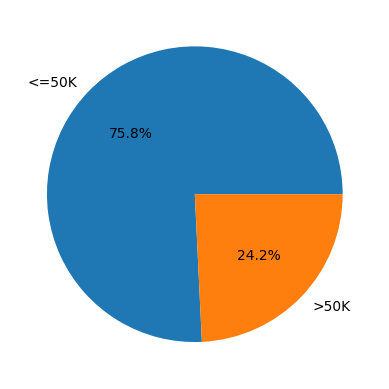

In [153]:
plt.pie(y_new.value_counts(), labels = y_new.unique(), autopct='%1.1f%%')

Approximately 75% of the population has an income below 50K while 25% has one above it. This indicates likely a high degree of inequality. Still, we do not know the actual distribution of incomes

In [154]:
x_new['age'].mean()

38.64068373196699

In [155]:
x_new['age'].median()

37.0

Histogram of Age:

<Axes: xlabel='age', ylabel='Count'>

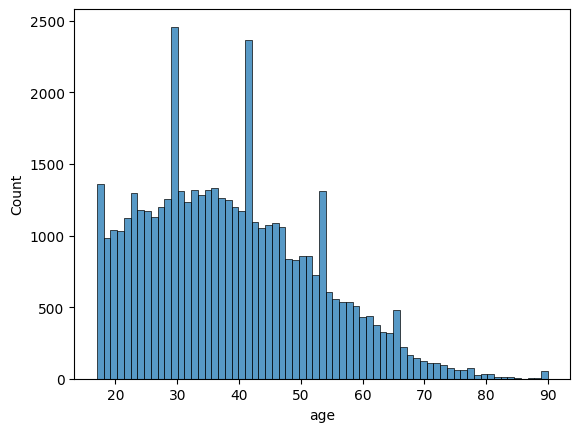

In [156]:
sns.histplot(x_new['age'])

In [157]:
x_new['capital-gain'].mean()

1091.1376493563764

In [158]:
x_new['capital-gain'].median()

0.0

Capital Gains Boxplot and Distribution Plot:

{'whiskers': [<matplotlib.lines.Line2D at 0x7e9dcd758c10>,
 'caps': [<matplotlib.lines.Line2D at 0x7e9dcd759150>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e9dcd758970>],
 'medians': [<matplotlib.lines.Line2D at 0x7e9dcd759690>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e9dcd759930>],
 'means': []}

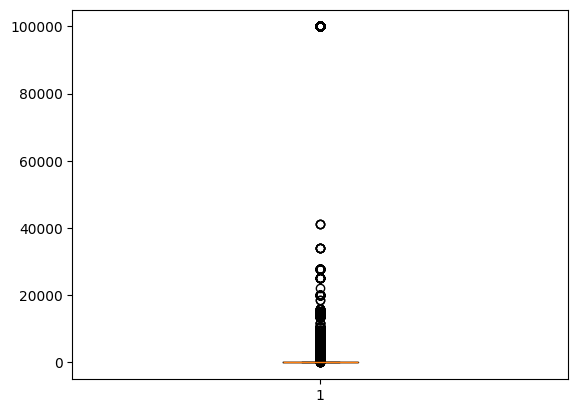

In [159]:
plt.boxplot(x_new['capital-gain'])

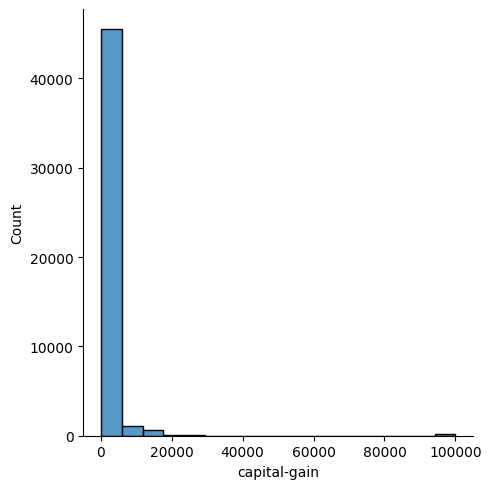

In [160]:
sns.displot(x_new['capital-gain'])

In [161]:
x_new['capital-loss'].mean()

87.85348900695071

In [162]:
x_new['capital-loss'].median()

0.0

Capital Loss Distribution Plot:

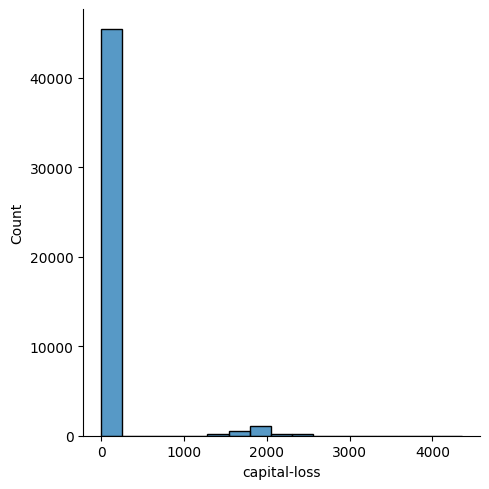

In [163]:
sns.displot(x_new['capital-loss'])

Histogram of Working Classes/Types:

<Axes: xlabel='workclass', ylabel='Count'>

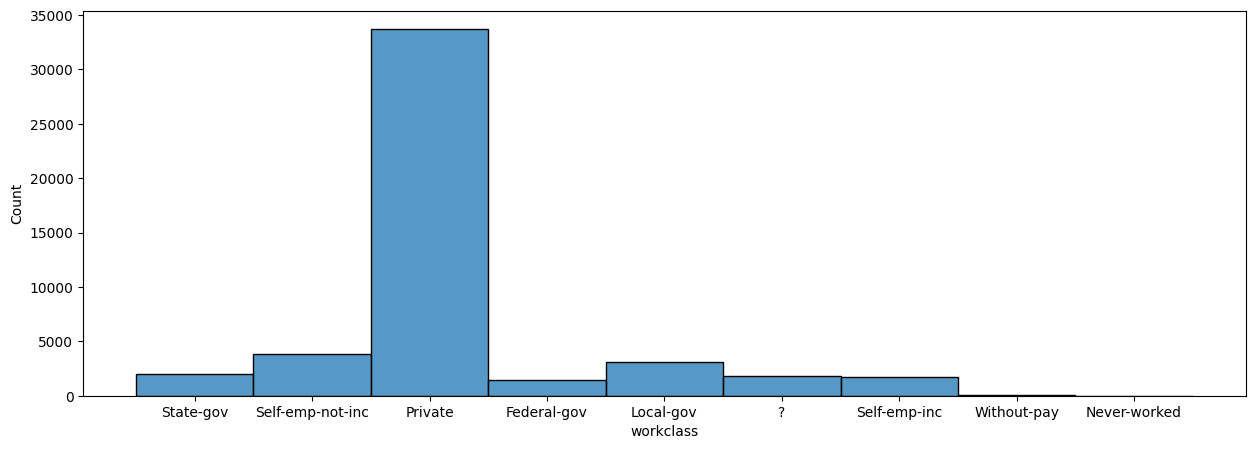

In [164]:
ax = plt.subplots(figsize=(15, 5))
sns.histplot(x_new['workclass'])

Barplot and Chart of Education Types:


<Axes: ylabel='education'>

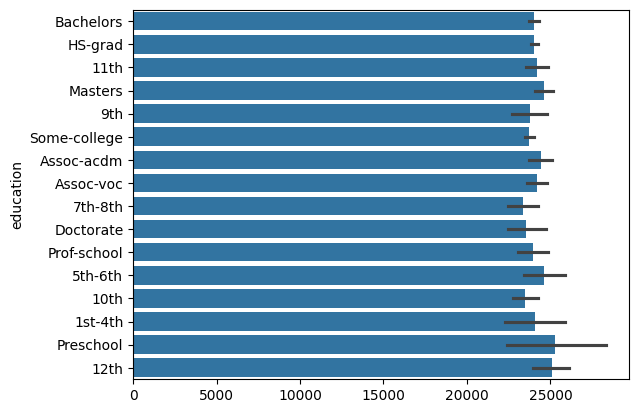

In [165]:
sns.barplot(x_new['education'])

In [166]:
x_new['education'].value_counts().sort_values(ascending= False).head()

,count
education,
HS-grad,15444
Some-college,10512
Bachelors,7881
Masters,2610
Assoc-voc,2034


Marital Status Chart and Countplot:

In [167]:
x_new['marital-status'].value_counts().sort_values(ascending= False).head()

,count
marital-status,
Married-civ-spouse,21966
Never-married,15555
Divorced,6526
Separated,1497
Widowed,1443


<Axes: xlabel='count', ylabel='marital-status'>

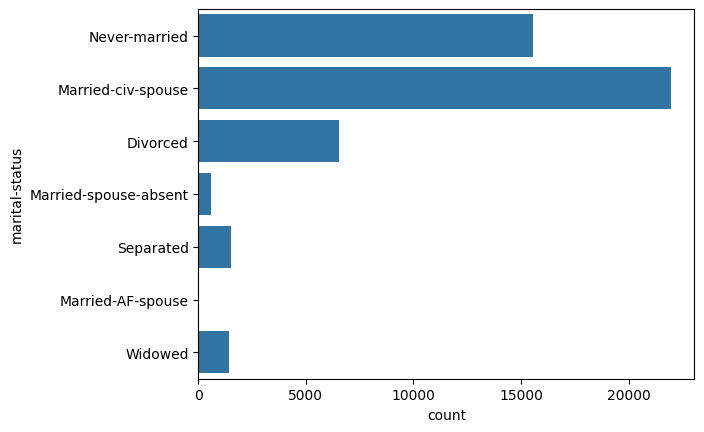

In [168]:
sns.countplot(x_new['marital-status'])

Charts of Sex and Relationship Statuses:

In [169]:
x_new['sex'].value_counts()

,count
sex,
Male,31937
Female,15684


In [170]:
x_new['relationship'].value_counts()

,count
relationship,
Husband,19396
Not-in-family,12281
Own-child,7228
Unmarried,5022
Wife,2253
Other-relative,1441


Boxplot of Hours Worked per Week:

{'whiskers': [<matplotlib.lines.Line2D at 0x7e9dbf3d9cc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e9dbf3da200>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e9dbf3d9b40>],
 'medians': [<matplotlib.lines.Line2D at 0x7e9dbf3da740>],
 'fliers': [],
 'means': []}

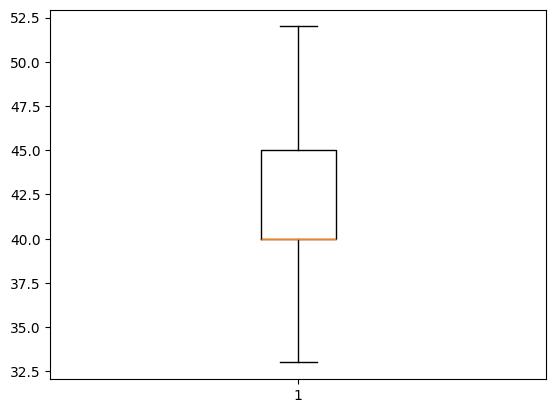

In [171]:
plt.boxplot(x_new['hours-per-week'], showfliers = False)

Barplot of Native Countries:

<Axes: ylabel='native-country'>

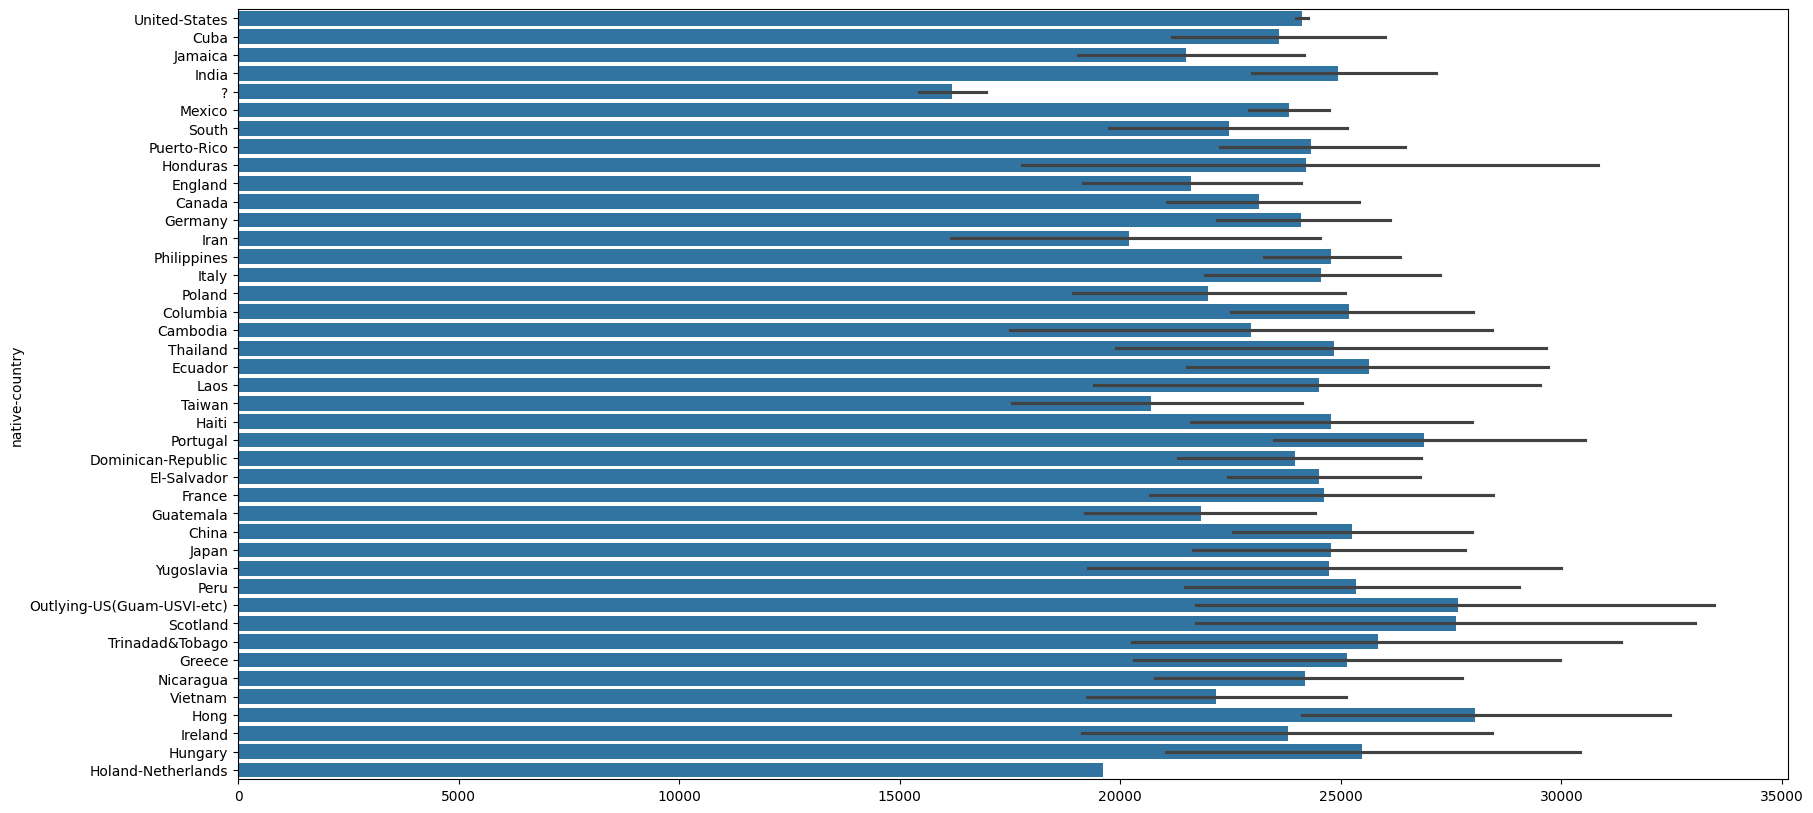

In [172]:
ax = plt.subplots(figsize=(20, 10))
sns.barplot(x_new['native-country'])

**Initial Visualizations**

In [173]:
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [174]:
x_less = df[df['income'] == '<=50K']
x_more = df[df['income'] == '>50K']

Job Types for Each Income Bracket:

(array([1.069e+03, 7.338e+03, 5.290e+02, 0.000e+00, 9.230e+02, 1.910e+02,
        0.000e+00, 5.550e+02, 9.340e+02, 2.000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

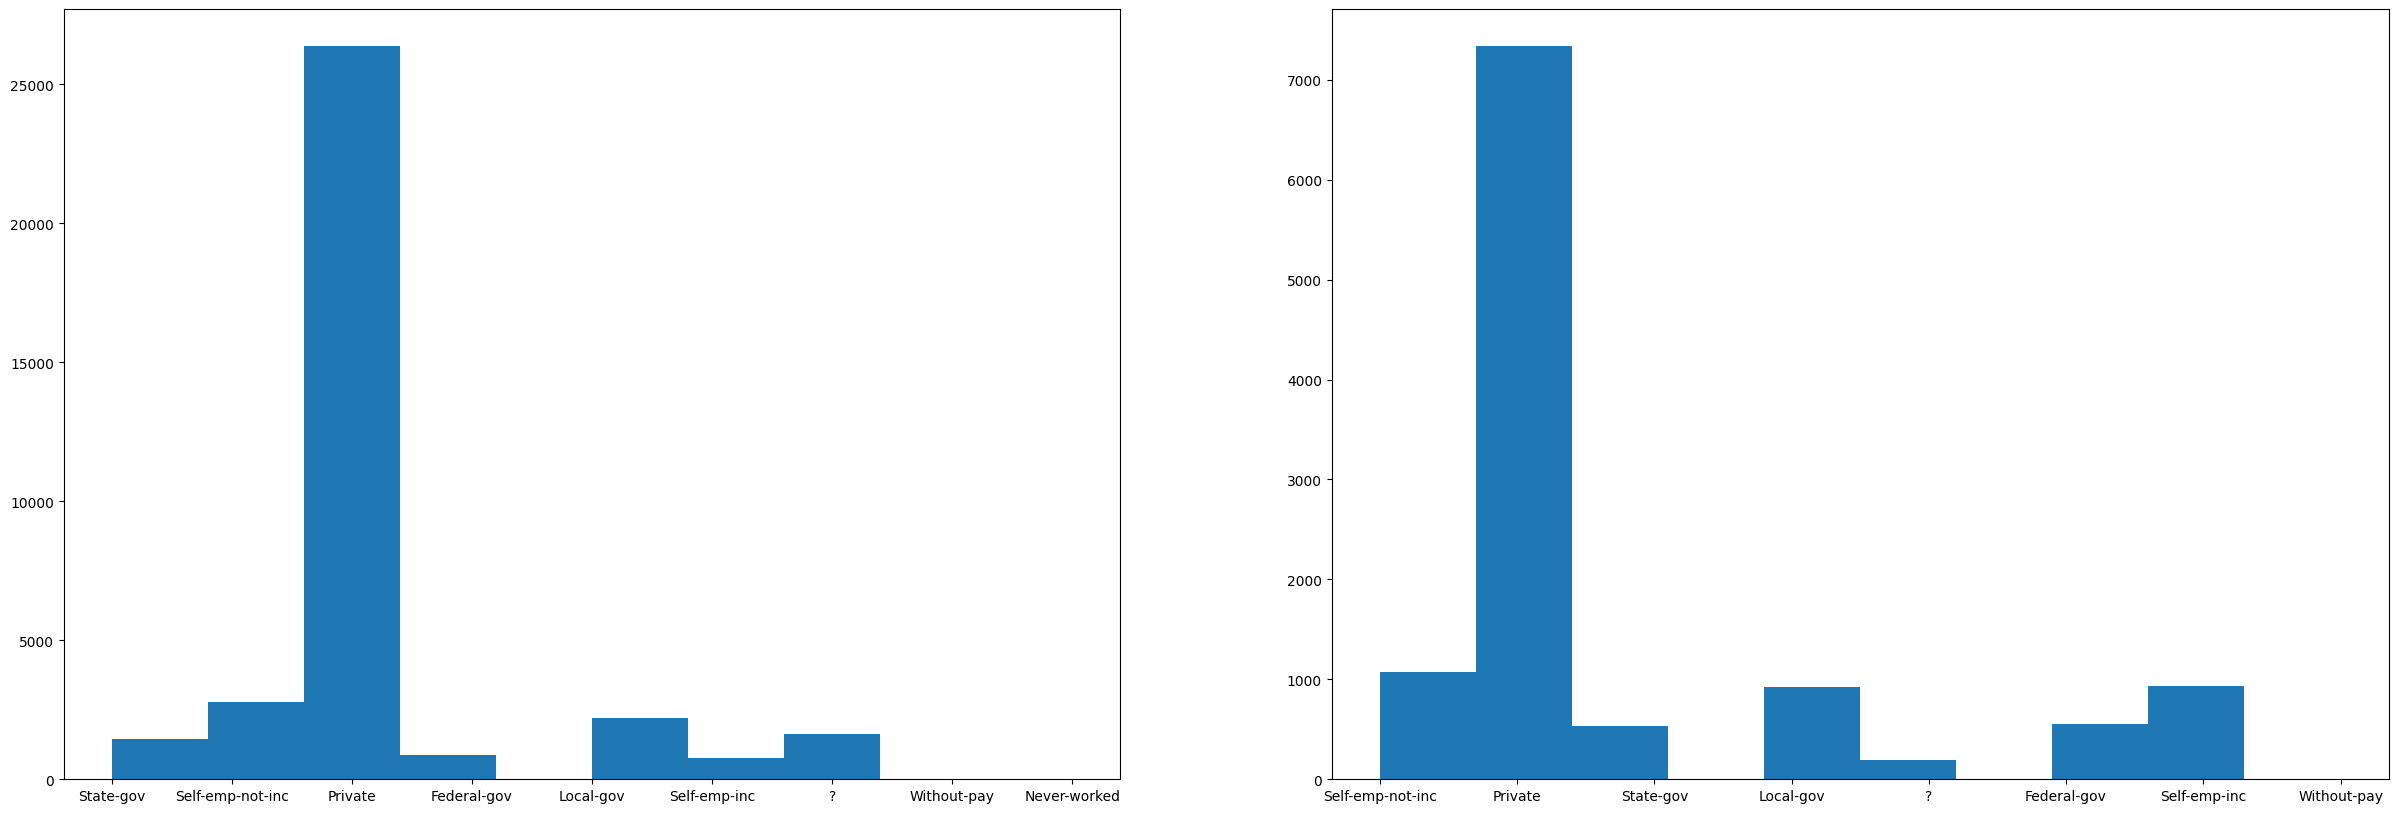

In [175]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))
ax[0].hist(x_less['workclass'])
ax[1].hist(x_more['workclass'])

Capital Gains for Hours Worked Per Week Depending On Income:

<Axes: xlabel='hours-per-week', ylabel='capital-gain'>

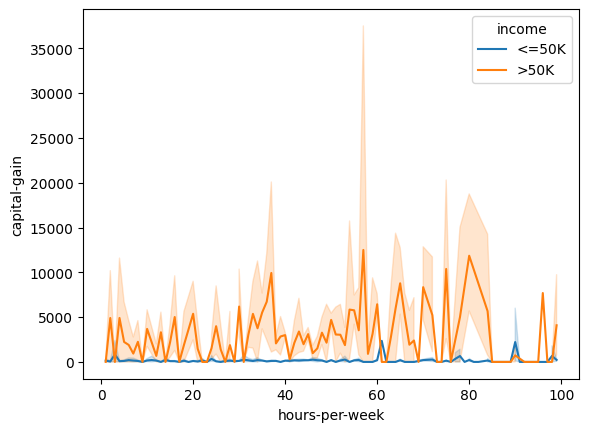

In [176]:
sns.lineplot(x = x_new['hours-per-week'], y = x_new['capital-gain'], hue = y_new)

Violinplot of Age Distribution Split by Income

<Axes: xlabel='income', ylabel='age'>

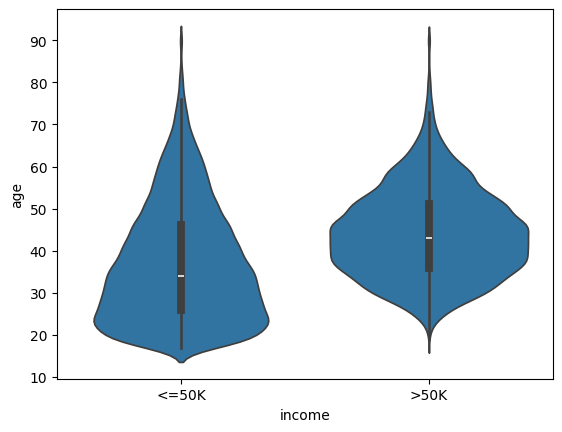

In [177]:
sns.violinplot(x = y_new, y = x_new['age'])

Capital Loss Violinplot Split by Income:

<Axes: xlabel='income', ylabel='capital-loss'>

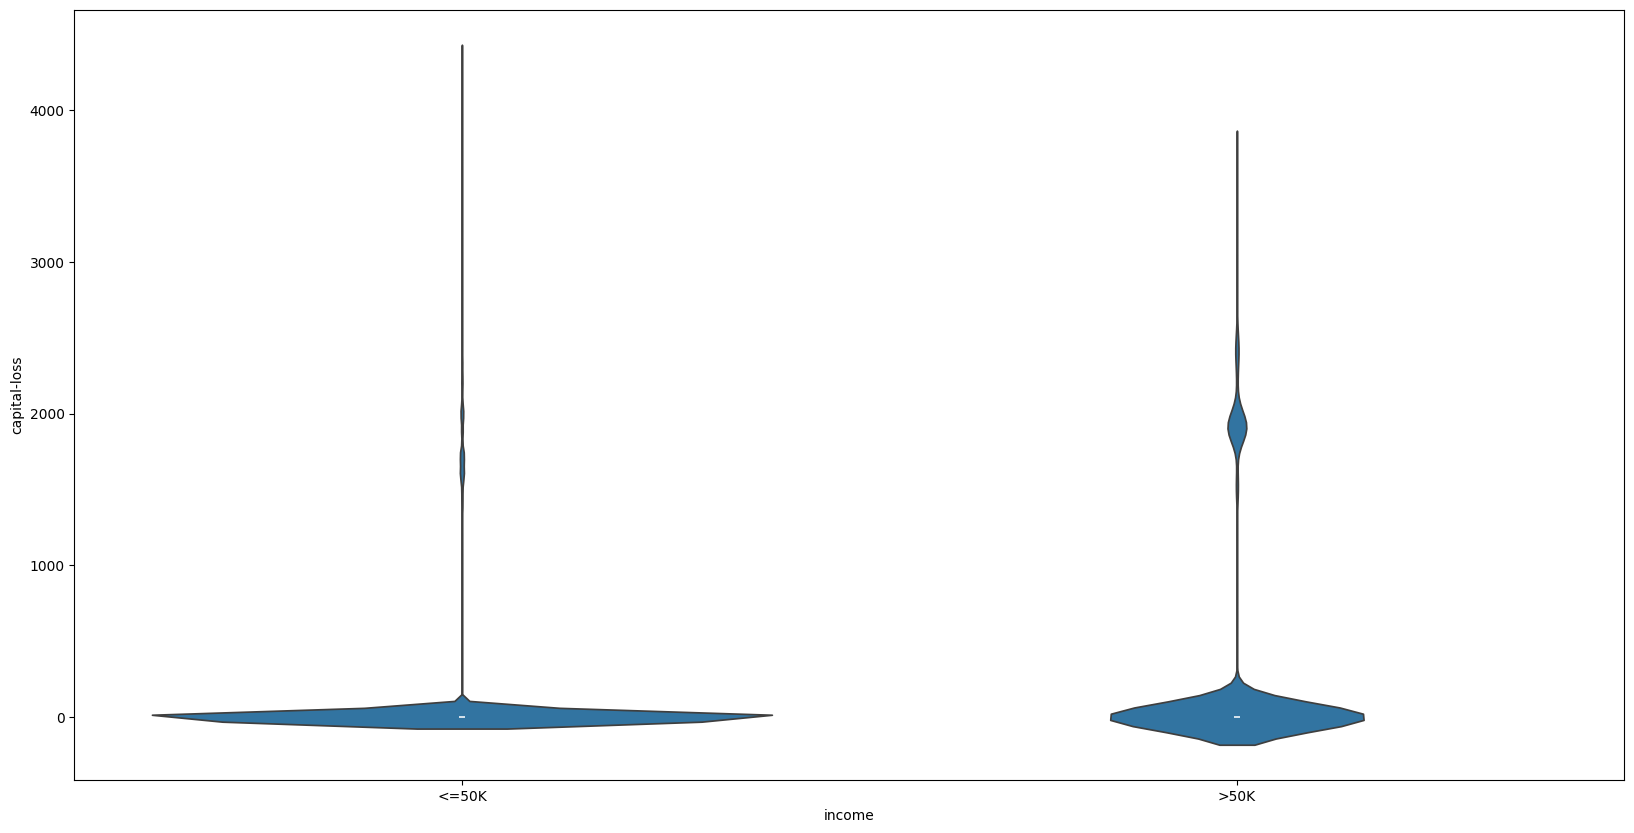

In [178]:
ax = plt.subplots(figsize = (20, 10))
sns.violinplot(x = y_new, y = x_new['capital-loss'])

Bar Graph of Marital Status:

<Axes: xlabel='marital-status', ylabel='count'>

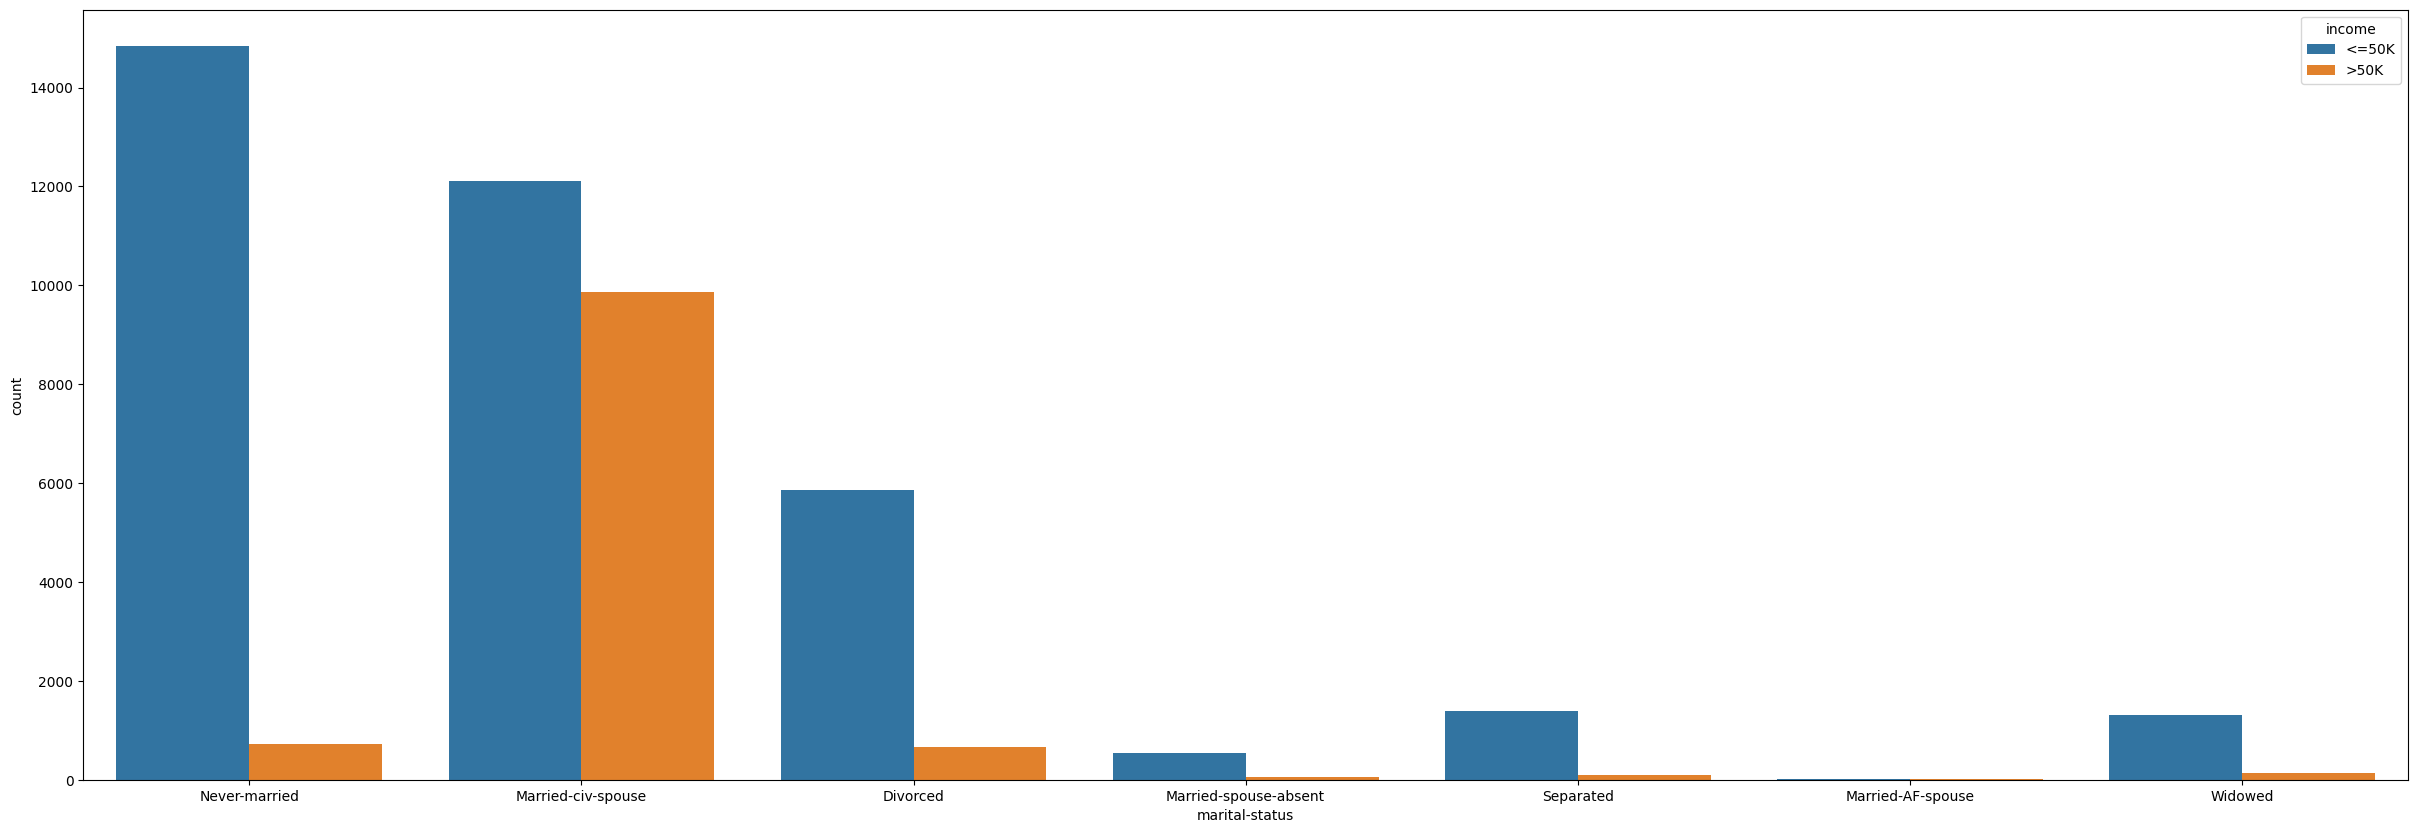

In [179]:
ax = plt.subplots(figsize=(30, 10))
sns.countplot(x = x_new['marital-status'], hue = y_new)

Occupation Bar Graphs:

Text(0.5, 1.0, 'More than 50K Income')

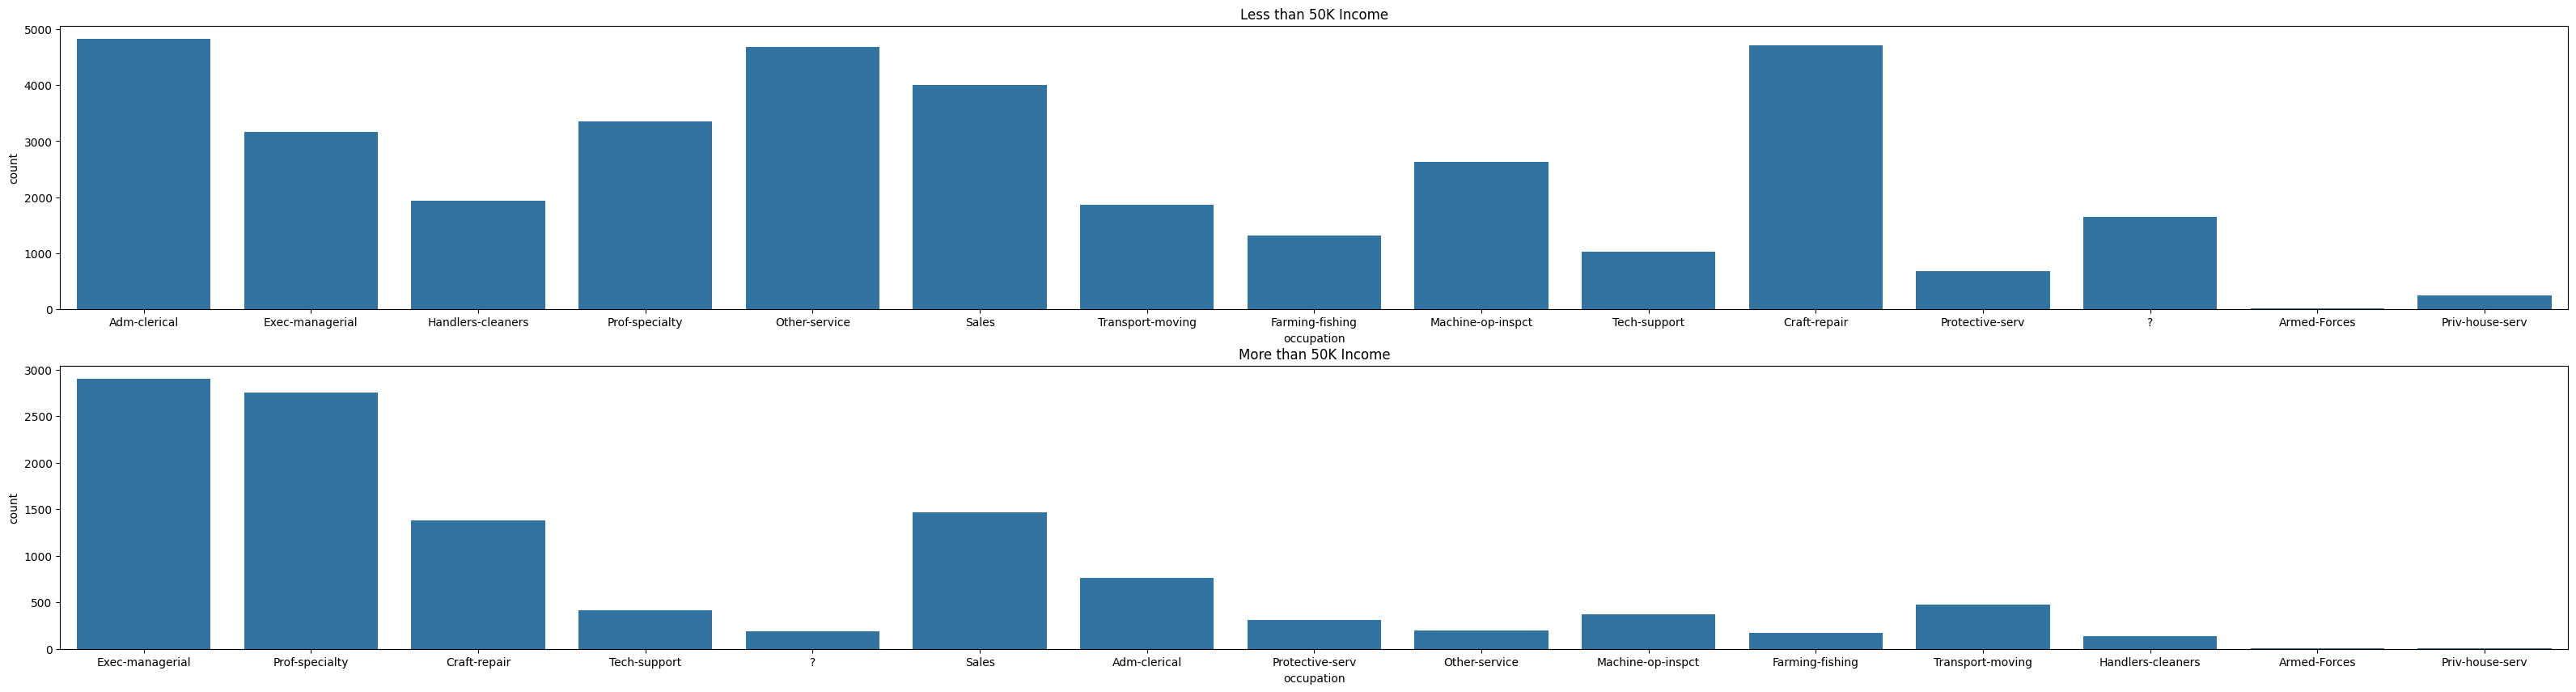

In [180]:
fig, ax = plt.subplots(2, 1, figsize=(40, 10))
sns.countplot(x = x_less['occupation'], ax = ax[0])
ax[0].set_title('Less than 50K Income')
sns.countplot(x = x_more['occupation'], ax = ax[1])
ax[1].set_title('More than 50K Income')

In [181]:
country_array = df['native-country']

In [182]:
country_more_array = x_more['native-country']

In [183]:
country_array = country_array.groupby(country_array).count()
country_array.head()

,native-country
native-country,
?,583
Cambodia,27
Canada,177
China,120
Columbia,85


In [184]:
country_more_array = country_more_array.groupby(country_more_array).count()
country_more_array.head()

,native-country
native-country,
?,146
Cambodia,9
Canada,63
China,36
Columbia,4


Proportion of High Income Residents for Each Immigrant Population:

In [185]:
country_prop = country_more_array / country_array
country_prop.sort_values(ascending = False)

,native-country
native-country,
India,0.421769
France,0.421053
Taiwan,0.406250
Iran,0.385965
England,0.382114
Greece,0.367347
Canada,0.355932
Yugoslavia,0.347826
Japan,0.347826


In [186]:
race_array = df.race

In [187]:
race_more_array = x_more.race

In [188]:
race_array = race_array.groupby(race_array).count()
race_array

,race
race,
Amer-Indian-Eskimo,460
Asian-Pac-Islander,1447
Black,4535
Other,393
White,40786


In [189]:
race_more_array = race_more_array.groupby(race_more_array).count()
race_more_array

,race
race,
Amer-Indian-Eskimo,55
Asian-Pac-Islander,397
Black,555
Other,49
White,10485


Racial Proportions Array:

In [190]:
race_prop = race_more_array / race_array
race_prop

,race
race,
Amer-Indian-Eskimo,0.119565
Asian-Pac-Islander,0.274361
Black,0.122381
Other,0.124682
White,0.257074


I made an array dividing the number of people in each race making >50K by the total population of each race. Evidently Asian groups and White groups have a significantly greater proportion making above 50K, indicating that race is a greater factor in predicting income than it should be. However, race is indirectly tied to both nation of origin and social strata within the US, due to the nation's long history of enforcing discrimination and disenfranchisement against non-White minorities. Thus race might not be a completely independent predictor.
Furthermore, I think it might be necessary to do this analysis for the racial makeup of each district in order to get a more accurate overview of racial inequality. For example, in the South there might be significant difference between African Americans and White Americans in the make-up of people making greater than 50K per year due to the long-standing effects of segregation and discrimination. However, in an already wealthy ethnically diverse area like Beverly Hills, racial inequality may be radically different, with African Americans and Hispanic upper classes earning high incomes.

**Modeling and Interpretation**

In [191]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

*Baseline Model*

In [192]:
len(y_new[y_new == ">50K"]) / len(y_new)

0.24235106360639214

In [70]:
my_array = []
for i in y_new:
  if i == '<=50K':
    my_array.append(False)
  else:
    my_array.append(True)

In [71]:
y_new = {'income': y_new, 'binary': my_array}

In [72]:
y_new = pd.DataFrame(y_new)
y_new

,income,binary
0,<=50K,False
1,<=50K,False
2,<=50K,False
3,<=50K,False
4,<=50K,False
...,...,...
48836,<=50K,False
48837,<=50K,False
48839,<=50K,False
48840,<=50K,False


*Decision Tree*

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2, random_state = 42)

In [75]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_new, y_new, test_size = 0.2, random_state = 42)

In [76]:
cat_col = x_new.select_dtypes(include = ['object']).columns
cat_col

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [77]:
transformer = make_column_transformer(
    (OneHotEncoder(drop = "first", handle_unknown='ignore'), cat_col),
    remainder = StandardScaler())

In [78]:
x_train_encoded = transformer.fit_transform(x_train)
x_test_encoded = transformer.transform(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


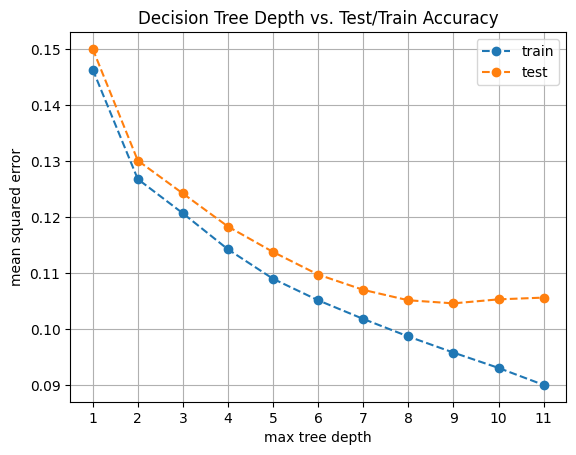

In [79]:
train_scores = []
test_scores = []
for d in range(1, 12):
    dtree = DecisionTreeRegressor(max_depth = d).fit(x_train_encoded, y_train)
    y_train_preds = dtree.predict(x_train_encoded)
    y_test_preds = dtree.predict(x_test_encoded)
    train_scores.append(mean_squared_error(y_train, y_train_preds))
    test_scores.append(mean_squared_error(y_test, y_test_preds))

plt.plot(range(1, 12), train_scores, '--o', label = 'train')
plt.plot(range(1, 12), test_scores, '--o', label = 'test')
plt.grid()
plt.legend()
plt.xticks(range(1, 12))
plt.xlabel('max tree depth')
plt.ylabel('mean squared error')
plt.title('Decision Tree Depth vs. Test/Train Accuracy');

In [193]:
dtree = DecisionTreeClassifier(max_depth = 6).fit(x_train_encoded, y_train)

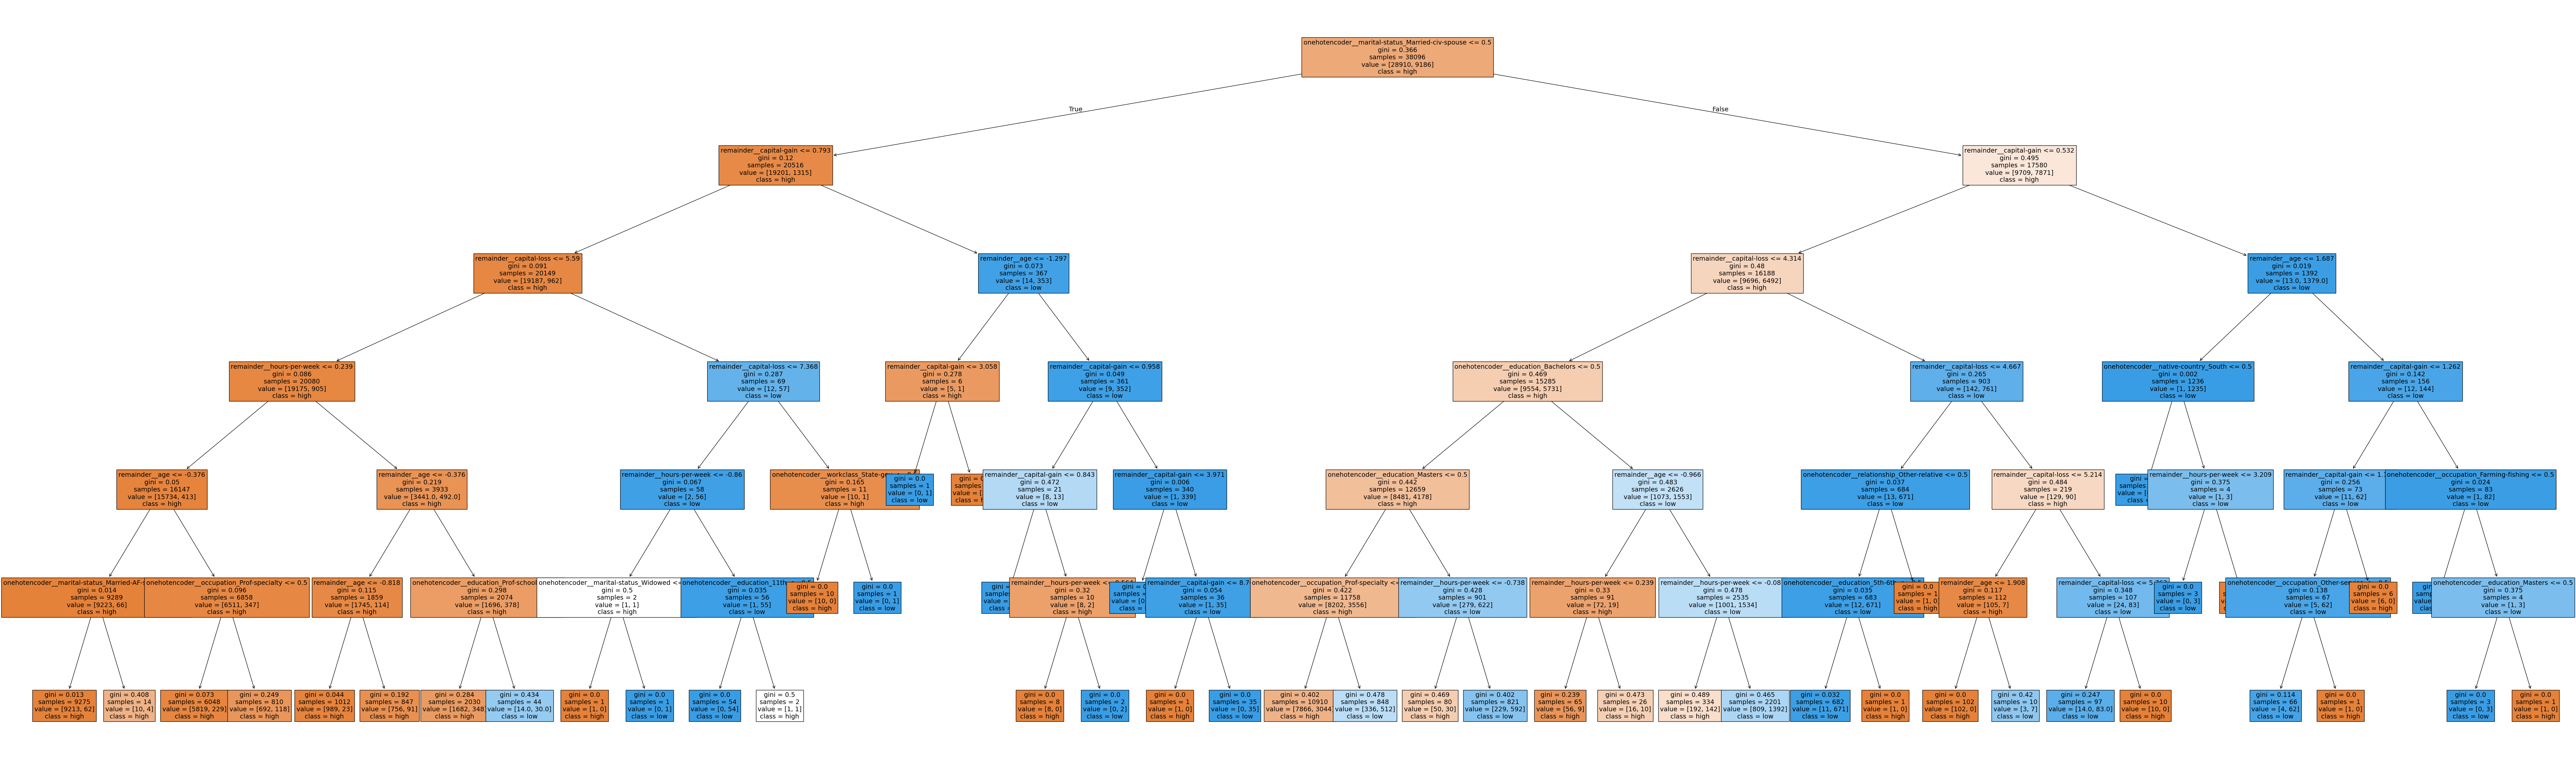

In [194]:
plt.figure(figsize=(100, 30))
plot_tree(dtree, filled=True, class_names=['high', 'low'], feature_names=transformer.get_feature_names_out().tolist(), fontsize=14);

In [85]:
pipe = Pipeline([('encoder', transformer), ('model', DecisionTreeClassifier(max_depth = 6))])

In [86]:
pipe.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object'))])),
                ('model', DecisionTreeClassifier(max_depth=6))])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


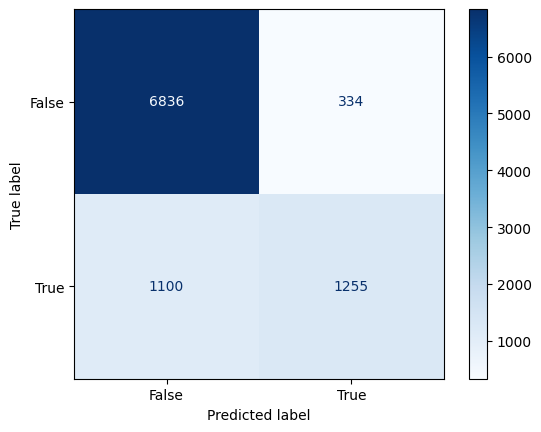

In [87]:
ConfusionMatrixDisplay.from_estimator(pipe, x_test, y_test, cmap = 'Blues')

In [88]:
r = permutation_importance(dtree, x_test_encoded.toarray(), y_test, n_repeats = 10) # Convert X_test_encoded to a dense array
features_list = pd.DataFrame(r['importances_mean'], index = transformer.get_feature_names_out().tolist()) # Use transformer instead of encoder to get feature names

In [89]:
features_list = features_list.sort_values(by = 0, ascending = False)
features_list

,0
onehotencoder__marital-status_Married-civ-spouse,0.059244
remainder__capital-gain,0.047927
onehotencoder__education_Bachelors,0.026194
onehotencoder__occupation_Prof-specialty,0.019013
remainder__capital-loss,0.011097
...,...
onehotencoder__occupation_Exec-managerial,0.000000
onehotencoder__occupation_Craft-repair,0.000000
onehotencoder__race_Asian-Pac-Islander,0.000000
onehotencoder__relationship_Not-in-family,-0.000063


In [114]:
print(f'Train Score: {pipe.score(x_train, y_train)}')
print(f'Test Score: {pipe.score(x_test, y_test)}')

Train Score: 0.8548141537169257
Test Score: 0.8494488188976378


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


*Random Forest*

In [195]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
forest = RandomForestClassifier(random_state = 42)

In [92]:
pipe2 = Pipeline([('transform', transformer), ('model', forest)])

In [93]:
forest.fit(x_train_encoded, y_train)

RandomForestClassifier(random_state=42)

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [95]:
params = {'model__n_estimators': [5, 10, 15],
          'model__max_depth': [1, 2, 3],
          'transform__remainder': ['passthrough', PolynomialFeatures(interaction_only=True)]}

In [96]:
grid = GridSearchCV(pipe2, param_grid=params)

In [97]:
grid.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object'))])),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'model__max_depth': [1, 2, 3],
                         'model__n_estimators': [5, 10, 15],
                         'transform__remainder': ['passthrough',
                                                  PolynomialFeatures(interaction_only=True)]})

In [98]:
grid.best_params_

{'model__max_depth': 3,
 'model__n_estimators': 10,
 'transform__remainder': PolynomialFeatures(interaction_only=True)}

In [99]:
grid.score(x_train, y_train)

0.8088513229735406

In [100]:
steps = grid.best_estimator_.named_steps

In [101]:
pd.DataFrame(steps['model'].feature_importances_,
             index = steps['transform'].get_feature_names_out(),
            columns = ['feature importance'])\
            .sort_values(by = 'feature importance',
            ascending = False)

,feature importance
onehotencoder__marital-status_Married-civ-spouse,0.179497
remainder__capital-gain,0.177036
remainder__capital-gain hours-per-week,0.096358
onehotencoder__relationship_Not-in-family,0.091588
remainder__age capital-gain,0.069919
...,...
onehotencoder__race_Asian-Pac-Islander,0.000000
onehotencoder__relationship_Wife,0.000000
onehotencoder__relationship_Other-relative,0.000000
onehotencoder__workclass_Without-pay,0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


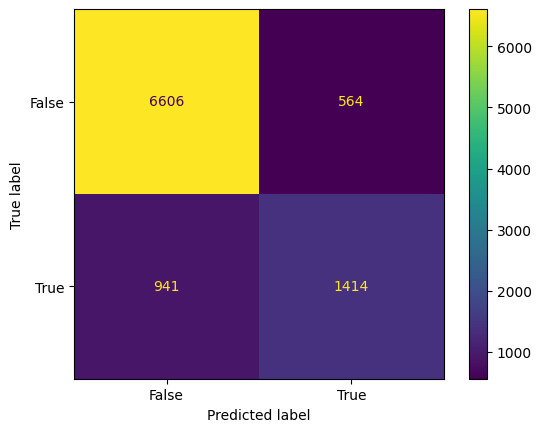

In [102]:
ConfusionMatrixDisplay.from_estimator(pipe2, x_test, y_test)

In [113]:
print(f'Train Score: {pipe2.score(x_train, y_train)}')
print(f'Test Score: {pipe2.score(x_test, y_test)}')

Train Score: 0.9740655186896262


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Test Score: 0.841994750656168


*Logistic Regression*

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
lr = LogisticRegression()

In [105]:
log_pipe = Pipeline([('transform', transformer), ('model', lr)])

In [106]:
log_pipe.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object'))])),
                ('model', LogisticRegression())])

In [112]:
print(f'Train Score: {log_pipe.score(x_train, y_train)}')
print(f'Test Score: {log_pipe.score(x_test, y_test)}')

Train Score: 0.8515592188156237
Test Score: 0.8486089238845145


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


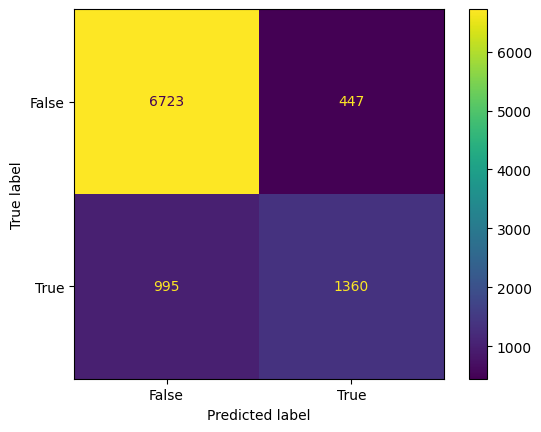

In [109]:
ConfusionMatrixDisplay.from_estimator(log_pipe, x_test, y_test)

In [110]:
r = permutation_importance(lr, x_test_encoded.toarray(), y_test, n_repeats = 10) # Convert X_test_encoded to a dense array
features_list = pd.DataFrame(r['importances_mean'], index = transformer.get_feature_names_out().tolist()) # Use transformer instead of encoder to get feature names

In [111]:
features_list = features_list.sort_values(by = 0, ascending = False)
features_list

,0
onehotencoder__marital-status_Married-civ-spouse,0.047906
onehotencoder__education_Bachelors,0.033197
remainder__capital-gain,0.031885
onehotencoder__education_Masters,0.016136
onehotencoder__occupation_Exec-managerial,0.010352
...,...
onehotencoder__native-country_Trinadad&Tobago,-0.000084
onehotencoder__native-country_Jamaica,-0.000084
onehotencoder__native-country_China,-0.000126
onehotencoder__occupation_Machine-op-inspct,-0.000325
